# Analyzing Factors Affecting Vehicle Prices

You are an analyst at Crankshaft List. Hundreds of free vehicle ads are posted on your website every day. You need to study the dataset from the past few years and determine the factors that affect the price of a vehicle.

<font color='blue'>
The objective of this project is to identify the factors that influence the price of a vehicle.<b></b>  

Testing several hypotheses:     
- Hypothesis 1: The newer the vehicle model, the higher its price.
- Hypothesis 2: Vehicles with lower odometer readings will have higher prices compared to vehicles with higher odometer readings.
- Hypothesis 3: Vehicles in good condition will have higher prices compared to vehicles in poor condition.
- Hypothesis 4: Vehicles with better transmission types (e.g., automatic) will have higher prices compared to vehicles with less favorable transmission types (e.g., manual).
- Hypothesis 5: Vehicles with more common paint colors (e.g., black or white) will have lower prices compared to vehicles with more exclusive paint colors (e.g., red or blue).
</font>

## Data Preprocessing

In [90]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [91]:
# Load the data file into a DataFrame
vehicle=pd.read_csv('datasets/vehicles_us.csv')

### Explore Initial Data

Dataset contains the following columns:


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, and others
- `odometer` — mileage of the vehicle at the time of the ad  
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date the ad was posted 
- `days_listed` — number of days the ad was listed before being removed

In [92]:
# Display general information/summary about the DataFrame
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [93]:
# Display sample data
vehicle.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [94]:
vehicle.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


<font color='blue'>This dataset has a total of 51,525 rows and 13 columns. There are 2 issues that require further investigation: there are columns with mismatched data types and missing values.
</font>

<span style="color: blue">Columns with mismatched data types:</span>

<span style="color: blue">
    
- model_year → should be int64
- is_4wd → should be boolean
- date_posted → should be datetime
</span>

<span style="color: blue">There are missing values in the following columns:</span>

<span style="color: blue">
    
- model_year
- cylinders
- odometer
- paint_color
- is_4wd (column with the most missing values)
</span>

### Conclusion and Next Steps

<font color='blue'>Based on the initial data, it is evident that there are several missing values (NaN) in certain columns such as model_year, cylinders, odometer, paint_color, and is_4wd. There are also columns with mismatched data types such as model_year (should be int64), is_4wd (should be boolean), and date_posted (should be datetime). The next step is to investigate the missing values and determine whether they should be deleted or replaced.
</font>

## Handling Missing Values

In [95]:
vehicle[['model_year','cylinders','odometer','paint_color','is_4wd']].isnull().sum()

model_year      3619
cylinders       5260
odometer        7892
paint_color     9267
is_4wd         25953
dtype: int64

### Missing Value (model_year)
To fill in the missing values in the model_year column, we will use the median for each car model.

In [96]:
vehicle[vehicle['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [97]:
model_year_median_group = vehicle.groupby('model')['model_year'].median()
model_year_median_df = pd.DataFrame(data = model_year_median_group)
model_year_median_df.columns = ['model_year']
model_year_median_df = model_year_median_df.reset_index()
model_year_median_df

,model,model_year
0,acura tl,2007.0
1,bmw x5,2010.0
2,buick enclave,2012.0
3,cadillac escalade,2009.0
4,chevrolet camaro,2013.0
...,...,...
95,toyota sienna,2008.0
96,toyota tacoma,2010.0
97,toyota tundra,2009.0
98,volkswagen jetta,2012.0


In [98]:
def fill_model_year(row):
    model = row['model']
    model_year = row['model_year']
    if pd.isnull(model_year):
        return model_year_median_df[model_year_median_df['model'] == model]['model_year'].values[0]
    else:
        return model_year

vehicle['model_year'] = vehicle.apply(fill_model_year, axis=1)
vehicle['model_year'].isna().sum()

0

### Missing Value (cylinders)
To fill in the missing values in the cylinders column, we will use the median for each car model.

In [99]:
vehicle[vehicle['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [100]:
cylinders_median_group = vehicle.groupby('model')['cylinders'].median()
cylinders_median_df = pd.DataFrame(data = cylinders_median_group)
cylinders_median_df.columns = ['cylinders']
cylinders_median_df = cylinders_median_df.reset_index()
cylinders_median_df

,model,cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


In [101]:
def fill_cylinders(row):
    model = row['model']
    cylinders = row['cylinders']
    if pd.isnull(cylinders):
        return cylinders_median_df[cylinders_median_df['model'] == model]['cylinders'].values[0]
    else:
        return cylinders

vehicle['cylinders'] = vehicle.apply(fill_cylinders, axis=1)
vehicle['cylinders'].isna().sum()

0

### Missing Value (odometer)
To fill in the missing values in the odometer column, we will use the median for each car type.

In [102]:
vehicle[vehicle['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [103]:
odometer_median_group = vehicle.groupby('type')['odometer'].median()
odometer_median_df = pd.DataFrame(data = odometer_median_group)
odometer_median_df.columns = ['odometer']
odometer_median_df = odometer_median_df.reset_index()
odometer_median_df

,type,odometer
0,SUV,118865.0
1,bus,109705.0
2,convertible,76000.0
3,coupe,63070.0
4,hatchback,111507.0
5,mini-van,126350.0
6,offroad,112723.0
7,other,106900.0
8,pickup,118622.0
9,sedan,105000.0


In [104]:
def fill_odometer(row):
    type = row['type']
    odometer = row['odometer']
    if pd.isnull(odometer) or odometer == 0.0:
        return odometer_median_df[odometer_median_df['type'] == type]['odometer'].values[0]
    else:
        return odometer

vehicle['odometer'] = vehicle.apply(fill_odometer, axis=1)
vehicle['odometer'].isna().sum()

0

### Missing Value (paint_color)
To fill in the missing values in the paint_color column, we will use the most common color count for each model.

In [105]:
vehicle[vehicle['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,118622.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,63070.0,automatic,coupe,NaN,NaN,2018-11-24,89


In [106]:
vehicle['paint_color'] = vehicle['paint_color'].fillna('unknown')
vehicle['paint_color'].isna().sum()

0

### Missing Value (is_4wd)
To fill in the missing values in the is_4wd column, we will use the value 0 since the data type of this column is boolean (to be changed in the next section).

In [107]:
vehicle[vehicle['is_4wd'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,118622.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [108]:
vehicle['is_4wd'] = vehicle['is_4wd'].fillna(0)
vehicle['is_4wd'].isna().sum()

0

In [109]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [110]:
vehicle.shape

(51525, 13)

## Fixing Data Types

In [111]:
#Change the data type of model_year to int64
vehicle['model_year'] = pd.to_datetime(vehicle['model_year'], format = '%Y')
vehicle['model_year'] = vehicle['model_year'].dt.year


#Change the data type of is_4wd to boolean
vehicle['is_4wd'] = vehicle['is_4wd'].astype(bool)

#Change the data type of date_posted to datetime
vehicle['date_posted'] = pd.to_datetime(vehicle['date_posted'], format = '%Y-%m-%d')

vehicle.info()
vehicle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


## Fixing Data Quality

In [112]:
# Add the date and time values when the ad was posted
vehicle['day_posted'] = vehicle['date_posted'].dt.strftime('%A')
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday
3,1500,2003,ford f-150,fair,8.0,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,Friday
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday


In [113]:
# Add the age of the vehicle at the time of the ad
vehicle['vehicle_age'] = (vehicle['date_posted'].dt.year) - (vehicle['model_year'])
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,vehicle_age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6
3,1500,2003,ford f-150,fair,8.0,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2


In [114]:
# Add the average mileage of the vehicle per year 
vehicle['yearly_mileage'] = vehicle['odometer'] / vehicle['vehicle_age']
vehicle['yearly_mileage'] = vehicle['yearly_mileage'].round()
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,vehicle_age,yearly_mileage
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7,20714.0
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7,12672.0
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.0
3,1500,2003,ford f-150,fair,8.0,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16,7414.0
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40452.0


In [115]:
# It might be helpful to replace the values in the 'condition' column with something that can be manipulated more easily. 
numeric_scale = {
'new' : 5,
'like new' : 4,
'excellent' : 3,
'good' : 2,
'fair' : 1,
'salvage' : 0
}

vehicle['condition'] = vehicle['condition'].replace(numeric_scale)
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,vehicle_age,yearly_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7,20714.0
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7,12672.0
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.0
3,1500,2003,ford f-150,1,8.0,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16,7414.0
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40452.0


## Check Cleaned Data

In [116]:
# Display general information/summary about the DataFrame
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  day_posted      51525 non-null  object        
 14  vehicle_age     51525 non-null  int64         
 15  ye

In [117]:
# Display sample data
vehicle.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,vehicle_age,yearly_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,7,20714.0
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,7,12672.0
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,6,18333.0
3,1500,2003,ford f-150,1,8.0,gas,118622.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,16,7414.0
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,40452.0
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,4,14488.0
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,3,26404.0
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,6,18246.0
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,Monday,6,17362.0
9,9200,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,11,13381.0


## Studying Core Parameters

The core parameters are:
- Price
- Age of the vehicle when the ad was posted
- Mileage
- Number of cylinders
- Condition

In [118]:
#Create a function to show information about the Core Parameters
def parameter_info(x): 
    print(vehicle[x].describe())
    vehicle.boxplot(x)

In [119]:
#Price parameter
parameter_info('price')

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


In [120]:
#Age of the vehicle when the ad was posted parameter
parameter_info('vehicle_age')

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64


In [121]:
#Mileage parameter
parameter_info('odometer')

count     51525.000000
mean     115576.753557
std       59728.659118
min           1.000000
25%       78000.000000
50%      118622.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64


In [122]:
#Number of cylinders parameter
parameter_info('cylinders')

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


In [123]:
#Condition parameter
parameter_info('condition')

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64


## Studying and Handling Outliers

In [124]:
list_of_selected_column = ['price','vehicle_age','odometer','cylinders','condition']

def upper_lower_whisker(column_name,data):
    Q1  = data[column_name].quantile(0.25)
    Q3  = data[column_name].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    return lower_whisker, upper_whisker

vehicle_cleaned = vehicle.copy()

In [125]:
for i in range(5):
    for column in list_of_selected_column:
        print('start cleaning outlier on ', column)
        lower, upper = upper_lower_whisker(column,vehicle_cleaned)
        vehicle_cleaned = vehicle_cleaned[(vehicle_cleaned[column] > lower) & (vehicle_cleaned[column] < upper)]
        print('cleaning outlier on ', column, ' was finished!')

start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  vehicle_age
cleaning outlier on  vehicle_age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!
start cleaning outlier on  cylinders
cleaning outlier on  cylinders  was finished!
start cleaning outlier on  condition
cleaning outlier on  condition  was finished!
start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  vehicle_age
cleaning outlier on  vehicle_age  was finished!
start cleaning outlier on  odometer
cleaning outlier on  odometer  was finished!
start cleaning outlier on  cylinders
cleaning outlier on  cylinders  was finished!
start cleaning outlier on  condition
cleaning outlier on  condition  was finished!
start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  vehicle_age
cleaning outlier on  vehicle_age  was finished!
start cleaning outli

In [126]:
vehicle_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46530 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           46530 non-null  int64         
 1   model_year      46530 non-null  int64         
 2   model           46530 non-null  object        
 3   condition       46530 non-null  int64         
 4   cylinders       46530 non-null  float64       
 5   fuel            46530 non-null  object        
 6   odometer        46530 non-null  float64       
 7   transmission    46530 non-null  object        
 8   type            46530 non-null  object        
 9   paint_color     46530 non-null  object        
 10  is_4wd          46530 non-null  bool          
 11  date_posted     46530 non-null  datetime64[ns]
 12  days_listed     46530 non-null  int64         
 13  day_posted      46530 non-null  object        
 14  vehicle_age     46530 non-null  int64         
 15  ye

## Studying Core Parameters without Outliers

In [127]:
#Create a function to show information about the Core Parameters without outliers.
def parameter_info_wo_outlier(x): 
    print(vehicle_cleaned[x].describe())
    vehicle_cleaned.boxplot(x)

In [128]:
#Price without outliers
parameter_info_wo_outlier('price')

count    46530.000000
mean     11181.385515
std       7577.154129
min          1.000000
25%       5100.000000
50%       8995.000000
75%      15990.000000
max      32299.000000
Name: price, dtype: float64


<font color='blue'>The price graph after removing outliers has the same distribution as the original dataframe (vehicle). 
</font>

In [129]:
#Age of the vehicle when the ad was posted without outliers
parameter_info_wo_outlier('vehicle_age')

count    46530.000000
mean         8.046959
std          4.795382
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         21.000000
Name: vehicle_age, dtype: float64


<font color='blue'>The vehicle_age graph after removing outliers has the same distribution as the original dataframe (vehicle).
</font>

In [130]:
#Mileage without outliers
parameter_info_wo_outlier('odometer')

count     46530.000000
mean     112522.503675
std       49887.658288
min           1.000000
25%       81000.000000
50%      118158.500000
75%      143000.000000
max      235997.000000
Name: odometer, dtype: float64


<font color='blue'>The odometer graph after removing outliers has the same distribution as the original dataframe (vehicle). 
</font>

In [131]:
#Number of cylinders without outliers
parameter_info_wo_outlier('cylinders')

count    46530.000000
mean         6.027681
std          1.656611
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


<font color='blue'>The cylinders graph after removing outliers has the same distribution as the original dataframe (vehicle). 
</font>

In [132]:
#Condition without outliers
parameter_info_wo_outlier('condition')

count    46530.000000
mean         2.646465
std          0.676313
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: condition, dtype: float64


<font color='blue'>The condition graph after removing outliers has the same distribution as the original dataframe (vehicle). 
</font>

## Ad Duration

In [133]:
vehicle_cleaned['days_listed'].describe()

count    46530.000000
mean        39.548829
std         28.216538
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<font color='blue'>An ad is typically listed for 33 days (median value). Ads removed in less than 33 days can be considered removed quickly, while ads listed for more than 33 days can be considered listed for a very long time.
</font>

## Average Price of Each Vehicle Type

In [134]:
#vehicle.pivot_table(index='type', aggfunc='value_counts')
vehicle_type_price = vehicle_cleaned.pivot_table(index='type', values='price', aggfunc=['count','mean'])
vehicle_type_price.columns = ['ads_total', 'mean_price']
vehicle_type_price_sorted = vehicle_type_price.sort_values('ads_total', ascending=False).reset_index()
vehicle_type_price_sorted

,type,ads_total,mean_price
0,sedan,11794,7018.855011
1,SUV,11519,10418.279017
2,truck,10512,15103.642028
3,pickup,5880,15017.597959
4,coupe,1945,13700.270951
5,wagon,1463,9106.660971
6,mini-van,1123,8106.095280
7,hatchback,987,6882.225937
8,van,572,8933.994755
9,convertible,323,13004.164087


In [135]:
vehicle_type_price_sorted.plot(kind='line', x='type', y='ads_total', style='o-', grid=True, figsize=(10,6)) 
plt.xticks(range(len(vehicle_type_price_sorted['type'])), vehicle_type_price_sorted['type'], rotation=45)
plt.ylabel('Total Ads')
plt.xlabel('Vehicle Type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<font color='blue'>The two vehicle types with the most ads are sedans and SUVs.
</font>

## Price Factor

In [136]:
#Sedan (price vs vehicle_age)
sedan_filtered = vehicle_cleaned.query('type=="sedan"')
print(sedan_filtered['price'].corr(sedan_filtered['vehicle_age']))
sedan_filtered.plot(x='vehicle_age', y='price', kind='scatter',grid=True)

-0.615506685098535


<AxesSubplot:xlabel='vehicle_age', ylabel='price'>

<font color='blue'>
For the sedan vehicle type, price and vehicle age show a negative correlation (-0.62). Although not very strong, the younger the vehicle age, the higher the price.   
</font>

In [137]:
#Sedan (price vs odometer)
print(sedan_filtered['price'].corr(sedan_filtered['odometer']))
sedan_filtered.plot(x='odometer', y='price', kind='scatter',grid=True)

-0.5089287921303178


<AxesSubplot:xlabel='odometer', ylabel='price'>

<font color='blue'>
For the sedan vehicle type, price and mileage show a negative correlation (-0.51). Although not very strong, the shorter the mileage, the higher the price.   
</font>

0.2837297298283874


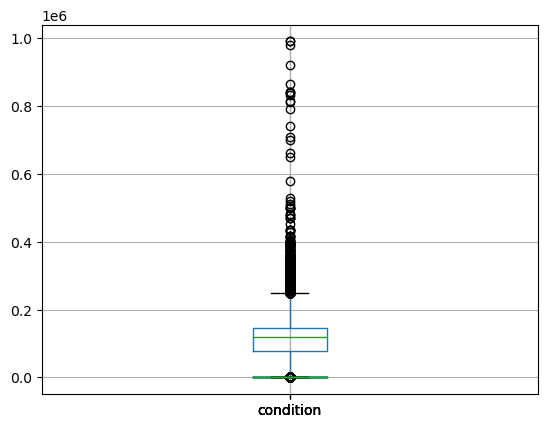

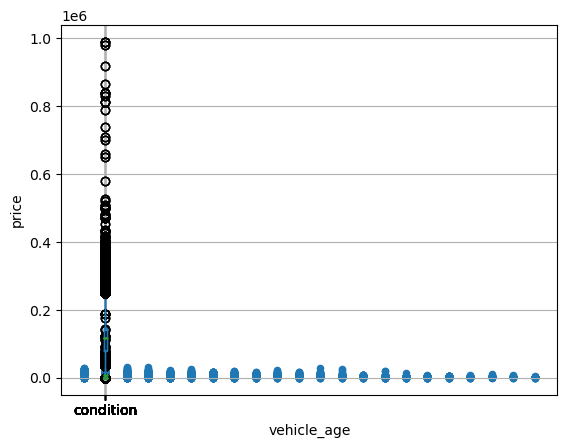

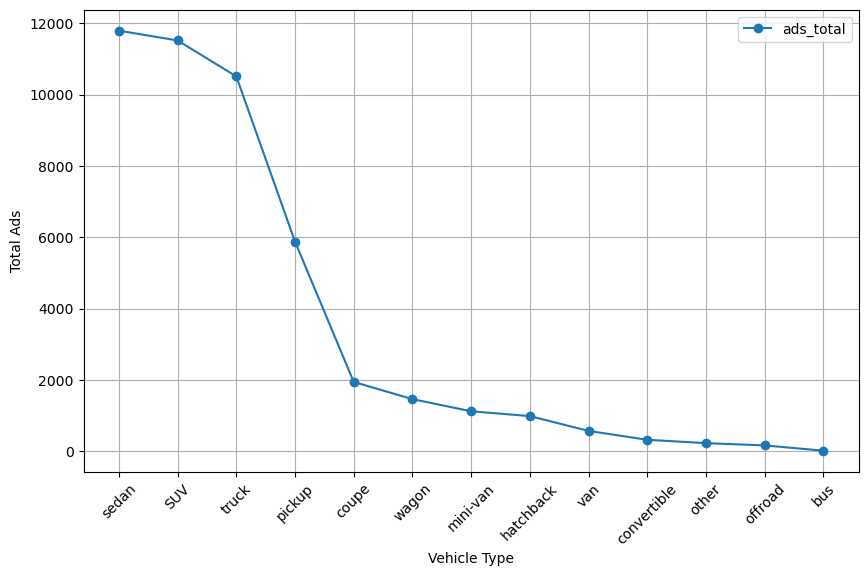

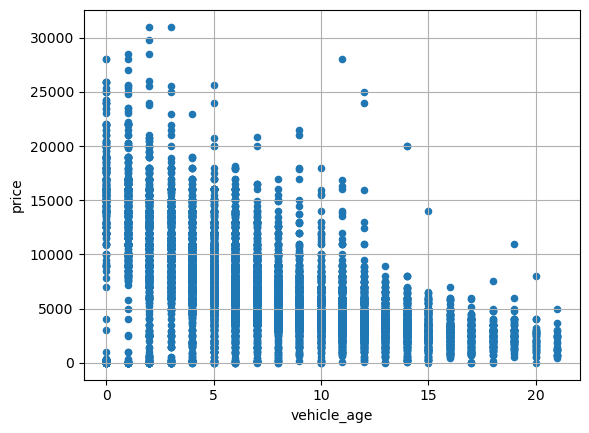

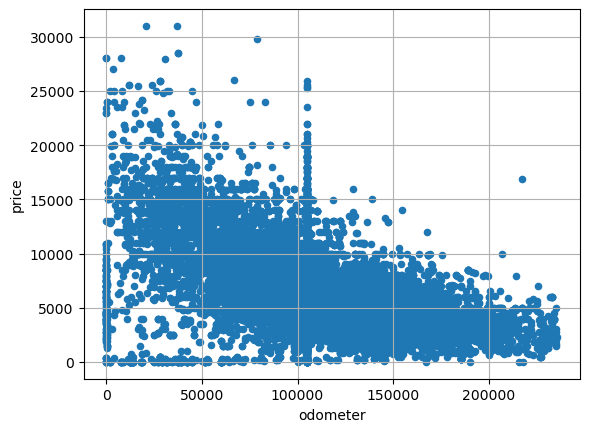

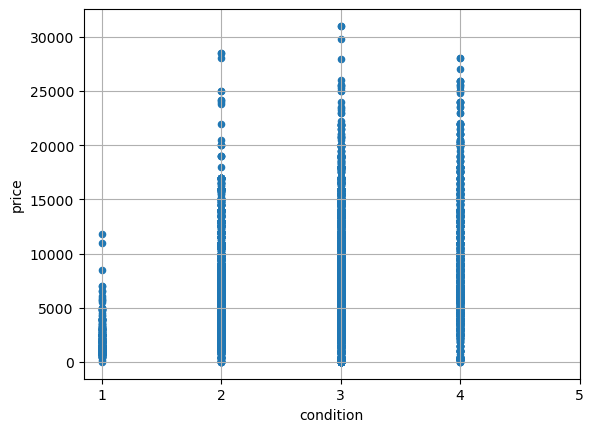

In [138]:
#Sedan (price vs condition)
print(sedan_filtered['price'].corr(sedan_filtered['condition']))
sedan_filtered.plot(x='condition', y='price', kind='scatter',grid=True)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.show()

<font color='blue'>
For the sedan vehicle type, price and condition show a positive correlation (-0.28). Although weak, better condition leads to higher prices.  
</font>

                count         mean          std  min     25%     50%      75%  \
transmission                                                                    
automatic     11106.0  7124.816316  4206.791292  1.0  3999.0  6200.0  9495.00   
manual          558.0  5566.168459  3834.522755  1.0  2999.0  4647.5  6995.00   
other           130.0  4201.876923  4666.197396  1.0     1.0  3897.5  6573.75   

                  max  
transmission           
automatic     31000.0  
manual        25000.0  
other         20700.0  


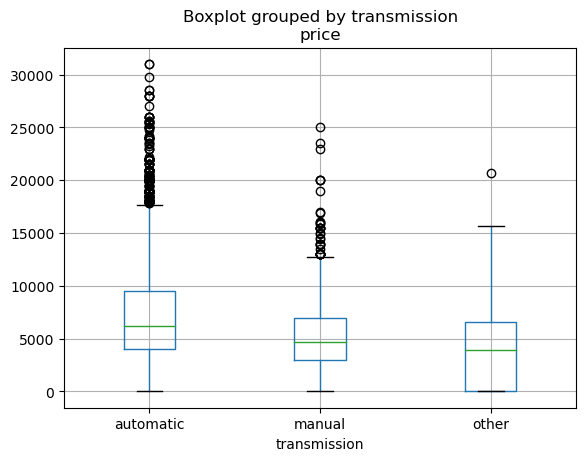

In [139]:
#Sedan (price vs transmission)
print(sedan_filtered.groupby('transmission')['price'].describe())
sedan_filtered.boxplot(column='price', by='transmission')
plt.show()

<font color='blue'>
For the sedan vehicle type, vehicles with automatic transmission tend to have higher prices compared to vehicles with manual or other transmission types.
</font>

              count          mean          std     min      25%     50%  \
paint_color                                                               
orange          9.0  10593.888889  7592.428769  1950.0  5300.00  8902.0   
black        1736.0   7568.792627  4314.897904     1.0  4350.00  6980.0   
white        1456.0   7531.197802  4451.941207     1.0  4500.00  6800.0   
grey         1591.0   7122.823382  3944.885827     1.0  4493.50  6420.0   
unknown      2115.0   6976.208038  4206.365597     1.0  3995.00  5999.0   
red           919.0   7020.205658  4341.723356     1.0  3995.00  5995.0   
silver       1997.0   6882.444166  4088.501320    12.0  3980.00  5995.0   
blue         1204.0   6591.495847  4159.409207     1.0  3900.00  5750.0   
custom        288.0   6443.510417  4561.659886     1.0  3483.75  5499.5   
purple         23.0   6229.217391  3402.589040   750.0  3937.50  5495.0   
brown         244.0   5377.381148  3279.920364   800.0  2999.75  4499.5   
green         191.0   493

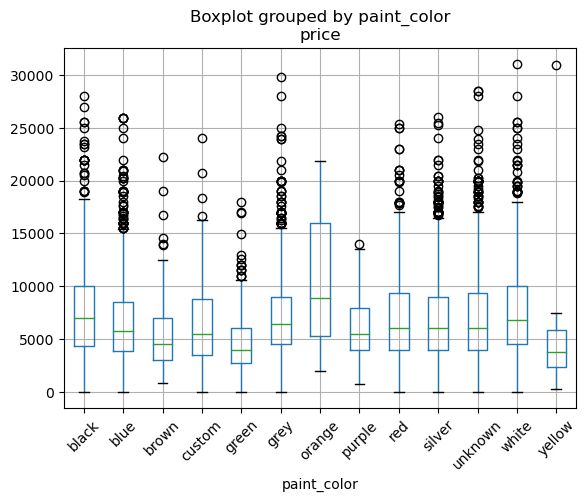

In [140]:
#Sedan (price vs paint_color)
sedan_filtered_unsorted = sedan_filtered.groupby('paint_color')['price'].describe()
sedan_filtered_sorted = sedan_filtered_unsorted.sort_values('50%', ascending=False)
print(sedan_filtered_sorted)
sedan_filtered.boxplot(column='price', by='paint_color')
plt.xticks(rotation=45)
plt.show()

<font color='blue'>
For the sedan vehicle type, orange is the color with the highest price. However, we will not include orange color because the number of ads is only 9 (not valid). So colors like black, white, and gray have higher prices compared to other colors. 
</font>

In [141]:
#SUV (price vs vehicle_age)
SUV_filtered = vehicle_cleaned.query('type=="SUV"')
print(SUV_filtered['price'].corr(SUV_filtered['vehicle_age']))
SUV_filtered.plot(x='vehicle_age', y='price', kind='scatter',grid=True)

-0.568974328026716


<AxesSubplot:xlabel='vehicle_age', ylabel='price'>

<font color='blue'>
For the SUV vehicle type, price and vehicle age show a negative correlation (-0.57). Although not very strong, the younger the vehicle age, the higher the price.   
</font>

In [142]:
#SUV (price vs odometer)
print(SUV_filtered['price'].corr(SUV_filtered['odometer']))
SUV_filtered.plot(x='odometer', y='price', kind='scatter',grid=True)

-0.4600885284029524


<AxesSubplot:xlabel='odometer', ylabel='price'>

<font color='blue'>
For the SUV vehicle type, price and mileage show a negative correlation (-0.46). Although not very strong, the shorter the mileage, the higher the price.   
</font>

0.24839242486190577


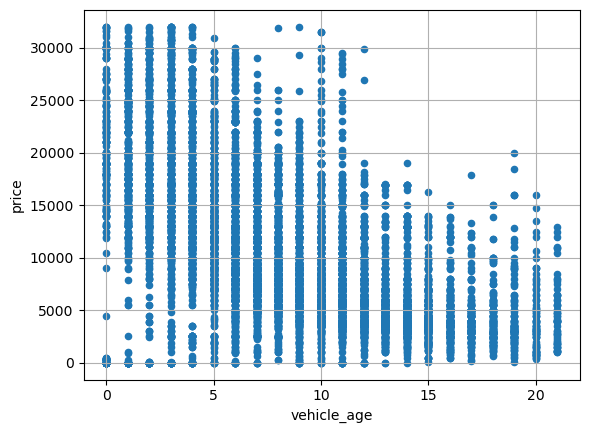

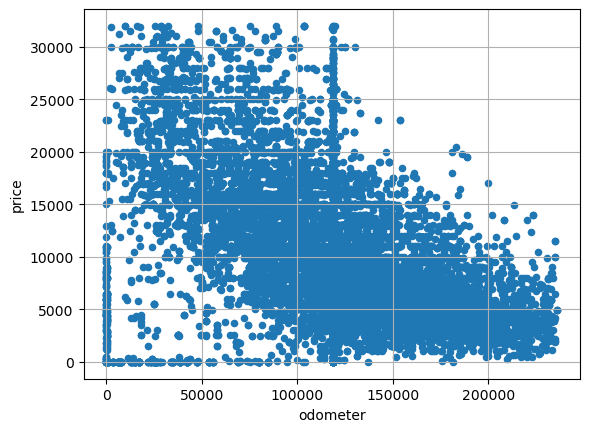

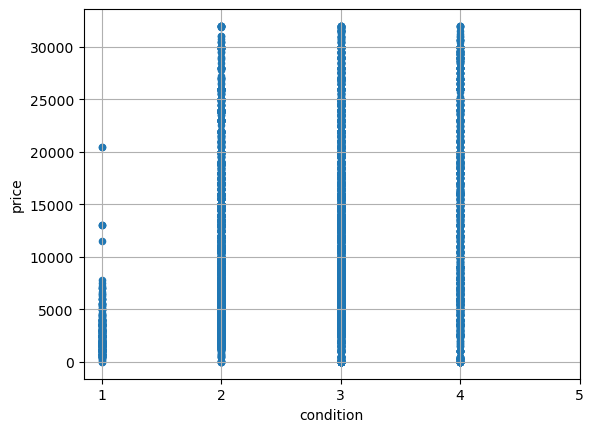

In [143]:
#SUV (price vs condition)
print(SUV_filtered['price'].corr(SUV_filtered['condition']))
SUV_filtered.plot(x='condition', y='price', kind='scatter',grid=True)
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.show()

<font color='blue'>
For the SUV vehicle type, price and condition show a positive correlation (-0.25). Although weak, better condition leads to higher prices.  
</font>

                count          mean          std    min     25%      50%  \
transmission                                                               
automatic     10921.0  10398.059701  6809.521030    1.0  5200.0   8850.0   
manual          441.0  12039.496599  6561.516988  500.0  6900.0  11799.0   
other           157.0   7270.878981  7671.414694    1.0     1.0   5550.0   

                  75%      max  
transmission                    
automatic     14500.0  32000.0  
manual        16500.0  31500.0  
other         12900.0  28999.0  


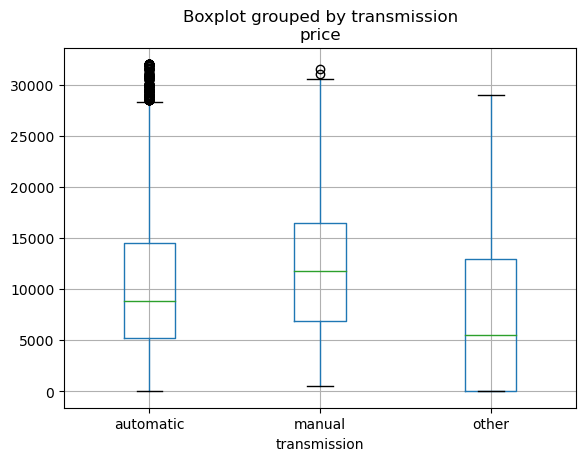

In [144]:
#SUV (price vs transmission)
print(SUV_filtered.groupby('transmission')['price'].describe())
SUV_filtered.boxplot(column='price', by='transmission')
plt.show()

<font color='blue'>
For the SUV vehicle type, vehicles with manual transmission tend to have higher prices compared to vehicles with automatic or other transmission types.
</font>

              count          mean          std     min      25%      50%  \
paint_color                                                                
orange         81.0  15041.222222  6632.423366   900.0  9988.00  16900.0   
yellow         45.0  14218.800000  8620.186653   500.0  6800.00  13488.0   
black        2024.0  11934.808794  7393.224142     1.0  5995.00  10990.0   
white        1806.0  11302.964009  7188.349892     1.0  5975.00   9900.0   
unknown      2068.0  10461.505319  6892.202307     1.0  5400.00   8900.0   
grey         1118.0  10322.231664  6820.483807     1.0  4999.25   8547.5   
silver       1502.0   9826.438083  6208.400394     1.0  5000.00   8400.0   
custom        287.0   9182.595819  6124.772784     1.0  4995.00   8200.0   
red           839.0   9662.137068  6472.896386     1.0  4650.00   7900.0   
brown         345.0   8689.388406  5644.158894   500.0  4200.00   7499.0   
blue          983.0   8503.193286  5698.889587     1.0  4500.00   6995.0   
green       

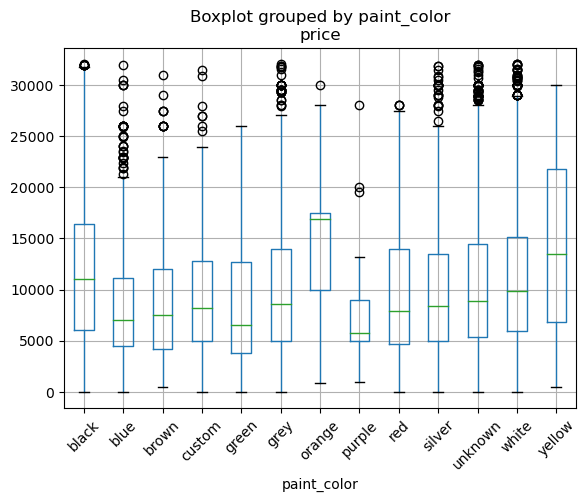

In [145]:
#SUV (price vs paint_color)
SUV_filtered_unsorted = SUV_filtered.groupby('paint_color')['price'].describe()
SUV_filtered_sorted = SUV_filtered_unsorted.sort_values('50%', ascending=False)
print(SUV_filtered_sorted)
SUV_filtered.boxplot(column='price', by='paint_color')
plt.xticks(rotation=45)
plt.show()

<font color='blue'>
For the SUV vehicle type, orange and yellow colors rank 1 and 2 for the highest prices. The color yellow will not be included because the number of ads is below 50 (not valid). Orange, black, white, and gray colors have higher prices compared to other colors. 
</font>

## General Conclusion

<font color='blue'>
In this project, missing values were handled for the following variables: model_year, cylinders, odometer, paint_color, and is_4wd. Data type changes were also made to the model_year column (to int64), is_4wd column (to boolean), and date_posted column (to datetime). Additional columns such as vehicle_age and average mileage per year were added, and the condition column was changed to numeric values to improve data quality. Outliers were also cleaned from the core parameter columns: price, vehicle_age, odometer, cylinders, and condition. It was found that after removing outliers, the graphs still showed the same distribution.
    
<b></b>
    
The two most popular vehicles (with the highest number of ads) chosen to represent the overall data were sedans and SUVs. From the findings, the factors showing the strongest correlation were the
</font>